# Linear Regression with Scikit-learn: Boston Housing Dataset
M2U3 - Exercise 8

## What are we going to do?
- We will analyse the Scikit-learn Boston Housing real estate sample dataset.
- We will train a multivariate linear regression model on the dataset.

Remember to follow the instructions for the submission of assignments indicated in [Submission Instructions](https://github.com/Tokio-School/Machine-Learning-EN/blob/main/Submission_instructions.md).

# Linear Regression: Scikit-learn on the Boston Housing dataset

## What are we going to do?
- We will analyse the Scikit-learn Boston Housing real estate sample dataset.
- We will train a multivariate linear regression model on the dataset.

Once again, we are going to fully train another linear regression model using Scikit-learn, and since we are generally going to follow the same steps as in the previous exercise, we are going to minimise the prompts so as not to distract you.

 For this exercise you can use the following references, among others:
- [Boston Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

*NOTE:* This function and dataset will be deprecated in Scikit-learn v1.2.

In [1]:
# TODO: Import all the necessary modules into this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Load the Boston Housing dataset

Before starting to work with the dataset, analyse its features and some of the examples included.

In [2]:
# TODO: Load the Boston Housing dataset, analyse its features and examples and finally load it as
# an (X, Y) tuple

housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns=housing.feature_names)

Y = housing.target

Y = pd.Series(Y, name="Target")

# tuple
data = (X, Y)

# Explore the dataset
print(housing.DESCR)




.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Data types, number of rows and columns, and missing values.

In [3]:
X.info()
print(f"\nNumber of rows: {X.shape[0]}")
print(f"Number of columns: {X.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB

Number of rows: 20640
Number of columns: 8


Basic statistics

In [4]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [5]:
Y.describe().T

,Target
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


## Preprocess the data
- Randomly reorder the data
- Normalise the data
- Divide the dataset into training and test subsets

*Note*: Before normalising the data from a new dataset, check whether it is necessary and ensure it has not already been normalised.

In [6]:
# TODO: Randomly reorder and normalise the data and split the dataset into 2 subsets, as needed


# Reorder the data
X, Y = shuffle(data[0], data[1], random_state=42)

# Divide the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train an initial model

- Train an initial model on the training subset without regularisation.
- Test the suitability of the model.
- Check if there is any deviation or overfitting.

If so, revert to using a linear regression model, such as the [Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso) (without regularisation):

In [7]:
# TODO: Train a simpler linear regression model on the training subset without regularisation

model = LinearRegression(fit_intercept=True).fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_train_scaled)
y_pred_test  = model.predict(X_test_scaled)


In [8]:
# TODO: Test the suitability of the model by evaluating it on the test set with several metrics
y_pred = model.predict(X_test_scaled)

r2 = model.score(X_test_scaled, y_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: 0.6090988648591611
MSE: 0.5234880331579915
MAE: 0.5308013178201428


In [9]:
# TODO: Check if the evaluation on both subsets is similar with the RMSE
y_pred_train = model.predict(X_train_scaled)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mse)

print("RMSE (train):", rmse_train)
print("RMSE (test):", rmse_test)

RMSE (train): 0.7242997484313538
RMSE (test): 0.7235247287812571


## Train the model with CV

- Train a model for each regularisation value to be considered.
- Train and evaluate them on the training subset using K-fold.
- Choose the optimal model and its regularisation.

Train the model using the [Lasso algorithm](https://scikit-learn.org/stable/modules/linear_model.html#lasso) and optimise the regularisation using GridSearchCV:

In [10]:
# TODO: Train a different model for each alpha on a different K-fold, evaluate them and select
# the most accurate model using GridSearchCV

grid = GridSearchCV(estimator = Lasso(), param_grid={"alpha": np.logspace(-4, 2, 20)}, scoring="neg_mean_squared_error",
                    cv=KFold(n_splits=5, shuffle=True, random_state=42)).fit(X_train_scaled, y_train)


print("Best alpha:", grid.best_params_['alpha'])
print("CV MSE:", -grid.best_score_)

best_model = grid.best_estimator_
y_pred_test = best_model.predict(X_test_scaled)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))


print("Test RMSE:", rmse_test)

Best alpha: 0.00379269019073225
CV MSE: 0.5307220848888541
Test RMSE: 0.7245739026937457


The best model is the first one because its RMSE is very similar to that of the second model, while being simpler.

## Finally, evaluate the model on the test subset

- Display the coefficients and RMSE of the best model.
- Evaluate the best model on the initial test subset.
- Calculate the residuals for the test subset and plot them.

MedInc : 0.8273416141253813
HouseAge : 0.12156503122550108
AveRooms : -0.27079575019723345
AveBedrms : 0.31240457405073213
Population : -0.0028764268539619936
AveOccup : -0.039639353121382954
Latitude : -0.8971718211309301
Longitude : -0.871097483048507

Intercept: 2.0666539867974816

Test RMSE: 0.7245739026937457



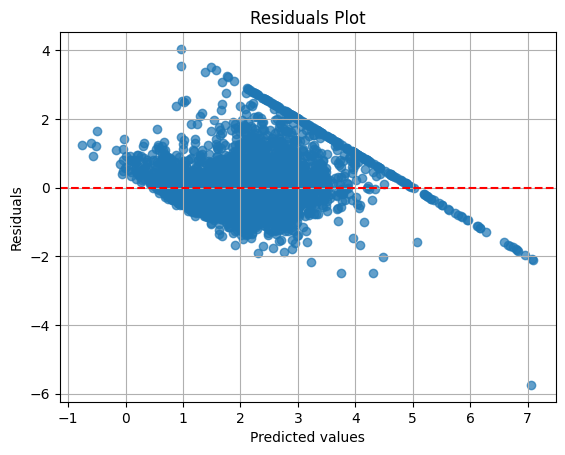

In [11]:
# TODO: Evaluate the best model on the initial test subset and calculate its residuals

for i in range(len(X.columns)):
    print(X.columns[i], ":", model.coef_[i])

print("\nIntercept:", model.intercept_)

print("\nTest RMSE:", rmse_test)

residuals = y_test - y_pred_test

print()
plt.scatter(y_pred_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.grid(True)
plt.show()

